### Root Morphology ###

In [21]:
# R code 2-sample t-Tests
# Example Horned lizards
# data file: HornedLizards.csv
 
#packages
library(ggplot2)
library(dplyr)
library(car)
install.packages("Hmisc")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [22]:
# Rename datafile
myData <- read.csv("/Users/cece/code/StatsLifeEnvScience/RootMorphData.csv")
myData

Plant.ID,Root.Number,Predecessor,Length..cm.,Prelength..cm.,Diameter..cm.,Branching.Order,Approx..grow.time..days.,Branching.Angle,Root.System.Width..cm.,Number.of.Lateral.Roots,Nodes,Edges,Treatment
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>
mg2_p_ave,NaN,NaN,2.175232,3.720023,0.04686136,1.222222,5.718072,81.27424,14.0,36,92,107,Phosphate
mg3_p _ave,NaN,NaN,2.033712,3.979368,0.05137076,2.163265,12.081914,91.20294,14.5,49,128,137,Phosphate
mg4_p_ave,NaN,NaN,2.367541,2.382128,0.05088711,1.037037,4.333548,59.10208,12.0,29,95,120,Phosphate
mg5_p_ave,NaN,NaN,1.022791,3.747602,0.02432606,1.803030,9.565319,67.54380,6.3,66,175,207,Phosphate
mg6_p_ave,NaN,NaN,1.693233,7.377614,0.03989434,1.384615,9.094979,70.36392,14.0,65,160,184,Phosphate
mg7_p_ave,NaN,NaN,1.608467,6.915258,0.03863595,2.297297,14.631943,86.49659,13.5,37,124,131,Phosphate
mg8_p_ave,NaN,NaN,1.598092,6.708670,0.04294271,1.183333,7.661367,72.09924,8.5,60,153,177,Phosphate
mg2_n_ave,NaN,NaN,2.059850,3.239315,0.03357174,1.333333,5.881182,84.76267,12.0,33,106,115,No Phosphate
mg1_n ave,NaN,NaN,3.136374,1.968017,0.04674726,1.516129,6.282717,111.12719,16.0,31,95,110,No Phosphate


### Mean Root Segment Length ###


In [ ]:
# visual inspection of data
myData$Treatment <- factor(myData$Treatment, levels = c("Phosphate", "No Phosphate"))

ggplot(myData, aes(x = Length..cm.)) + 
  geom_histogram(fill = "firebrick", col = "black",binwidth = 1,
                 boundary = 0, closed = "left") +
  facet_wrap( ~ Treatment, ncol = 1, scales = "free_y") +
  labs(x = "Lateral Root Length (cm)", y = "Frequency") + 
  theme_classic()

In [24]:
# Test for normality

# pooled data
shapiro.test(myData$Length..cm.)

# individual samples tested
myData %>% group_by(Treatment) %>%  
  summarise(statistic = shapiro.test(Length..cm.)$statistic,
            p.value = shapiro.test(Length..cm.)$p.value)


	Shapiro-Wilk normality test

data:  myData$Length..cm.
W = 0.87057, p-value = 0.04274


Treatment,statistic,p.value
<fct>,<dbl>,<dbl>
Phosphate,0.9520027,0.7478888
No Phosphate,0.8731498,0.1977357


In [25]:
# Test for equal variance: levene's test
leveneTest(myData$Length..cm., group = myData$Treatment,
           center = mean)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,8.183349,0.01433638
,12,NA,NA


In [26]:
# 2-sample t-test
t.test( Length..cm. ~ Treatment, data = myData, var.equal = TRUE)


	Two Sample t-test

data:  Length..cm. by Treatment
t = -2.3752, df = 12, p-value = 0.03507
alternative hypothesis: true difference in means between group Phosphate and group No Phosphate is not equal to 0
95 percent confidence interval:
 -1.82560524 -0.07871608
sample estimates:
   mean in group Phosphate mean in group No Phosphate 
                  1.785581                   2.737742 


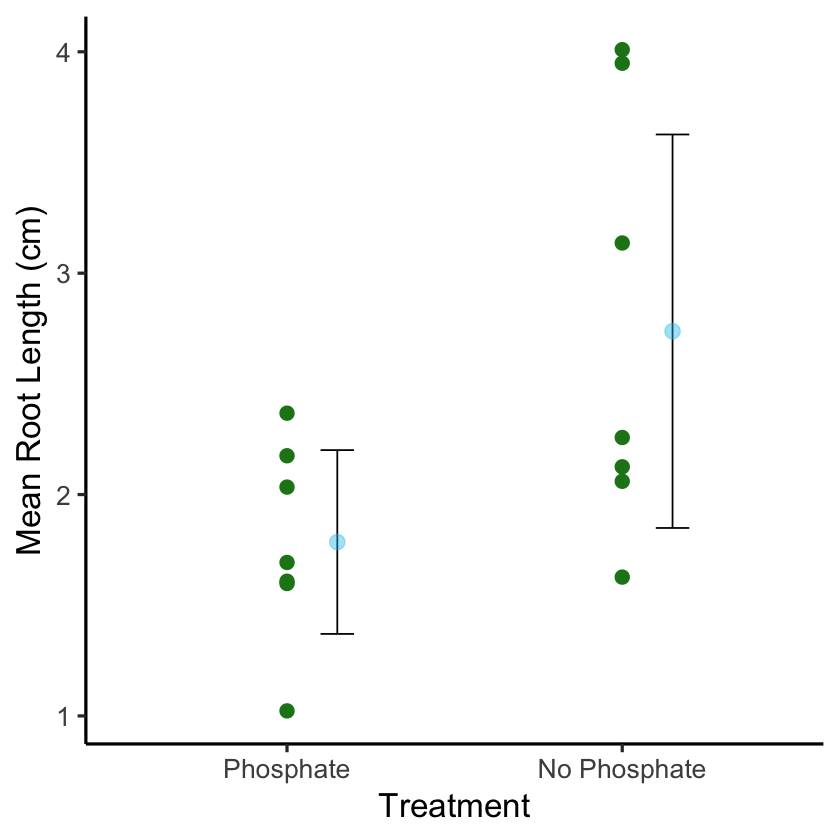

In [109]:
#Strip chart with mean and 95% confidence interval as error bars)
ggplot(myData, aes(x = Treatment, y = Length..cm.)) +
  geom_point(color = "#1d831d", size = 4, shape = 16) +
  stat_summary(fun.data = mean_cl_normal, geom = "errorbar",
               width = 0.1, position = position_nudge(x = 0.15)) +
  stat_summary(fun.y = mean, geom = "point", color = "#10c2ee6c",
               size = 4, position = position_nudge(x = 0.15)) +
  labs(x = "Treatment", y = "Mean Root Length (cm)") +
  theme_classic(base_size = 20)

### Mean Branching Angle ###

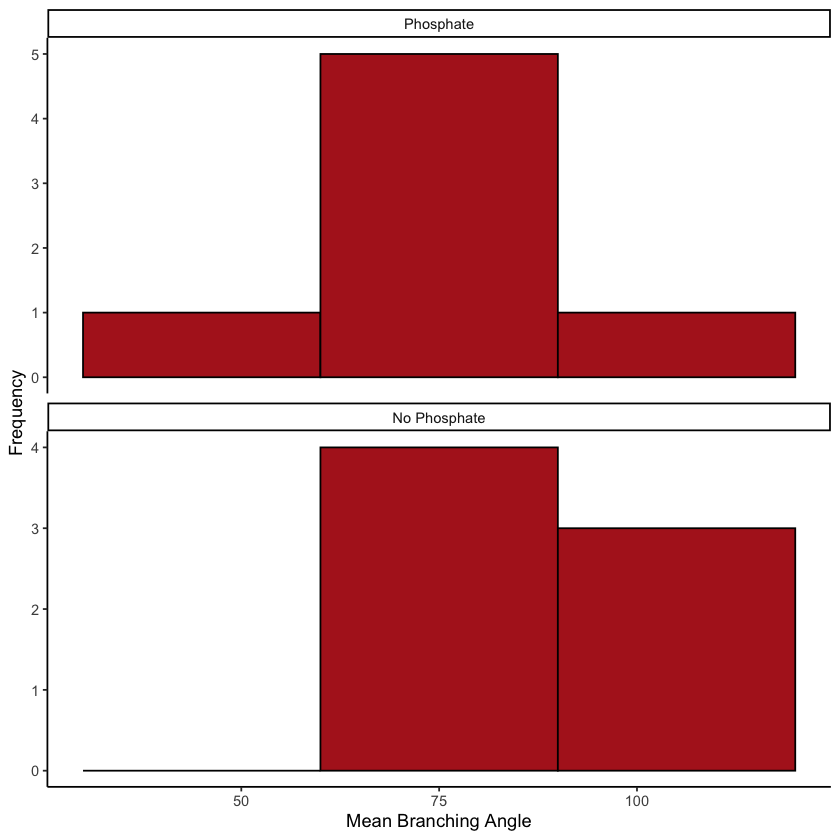

In [34]:
# visual inspection of data
myData$Treatment <- factor(myData$Treatment, levels = c("Phosphate", "No Phosphate"))

ggplot(myData, aes(x = Branching.Angle)) + 
  geom_histogram(fill = "firebrick", col = "black", binwidth = 30,
                 boundary = 0, closed = "left") +
  facet_wrap( ~ Treatment, ncol = 1, scales = "free_y") +
  labs(x = "Mean Branching Angle", y = "Frequency") + 
  theme_classic()

In [35]:
# Test for normality

# pooled data
shapiro.test(myData$Branching.Angle)

# individual samples tested
myData %>% group_by(Treatment) %>%  
  summarise(statistic = shapiro.test(Branching.Angle)$statistic,
            p.value = shapiro.test(Branching.Angle)$p.value)


	Shapiro-Wilk normality test

data:  myData$Branching.Angle
W = 0.9757, p-value = 0.9422


Treatment,statistic,p.value
<fct>,<dbl>,<dbl>
Phosphate,0.9656457,0.8654499
No Phosphate,0.9097242,0.3939674


In [ ]:
# Test for equal variance: levene's test
leveneTest(myData$Branching.Angle, group = myData$Treatment,
           center = mean)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.180653,0.6783346
,12,NA,NA


In [48]:
# 2-sample t-test
t.test( Branching.Angle ~ Treatment, data = myData, var.equal = FALSE)


	Welch Two Sample t-test

data:  Branching.Angle by Treatment
t = -2.0403, df = 11.668, p-value = 0.06462
alternative hypothesis: true difference in means between group Phosphate and group No Phosphate is not equal to 0
95 percent confidence interval:
 -28.0831131   0.9662195
sample estimates:
   mean in group Phosphate mean in group No Phosphate 
                  75.44040                   88.99885 


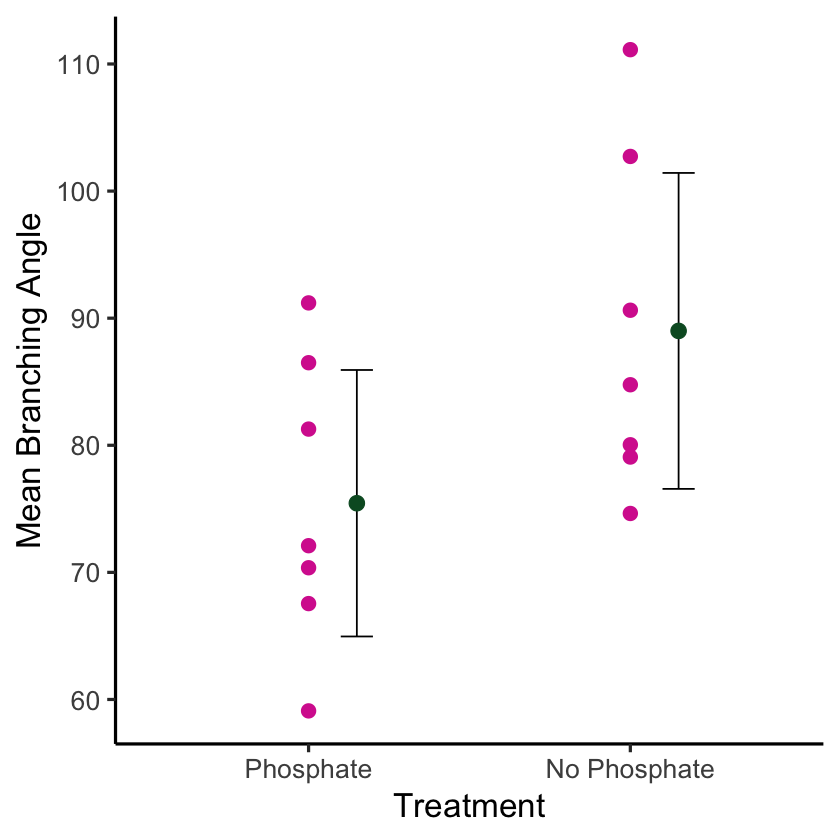

In [103]:
#Strip chart with mean and 95% confidence interval as error bars)
ggplot(myData, aes(x = Treatment, y = Branching.Angle)) +
  geom_point(color = "#d62e9e", size = 4, shape = 16) +
  stat_summary(fun.data = mean_cl_normal, geom = "errorbar",
               width = 0.1, position = position_nudge(x = 0.15)) +
  stat_summary(fun.y = mean, geom = "point", color = "#07582a",
               size = 4, position = position_nudge(x = 0.15)) +
  labs(x = "Treatment", y = "Mean Branching Angle") +
  theme_classic(base_size = 20)

### Graph Size ###

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


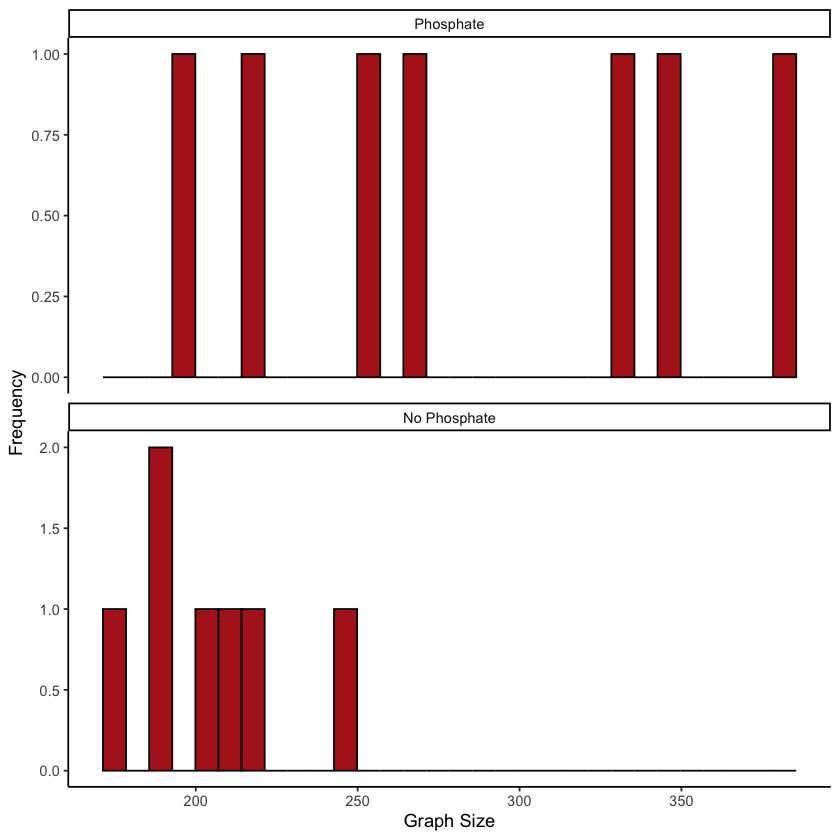

In [40]:
# visual inspection of data
myData$Treatment <- factor(myData$Treatment, levels = c("Phosphate", "No Phosphate"))

ggplot(myData, aes(x = Nodes + Edges)) + 
  geom_histogram(fill = "firebrick", col = "black",
                 boundary = 0, closed = "left") +
  facet_wrap( ~ Treatment, ncol = 1, scales = "free_y") +
  labs(x = "Graph Size", y = "Frequency") + 
  theme_classic()

In [41]:
# Test for normality

# pooled data
shapiro.test(myData$Nodes + myData$Edges)

# individual samples tested
myData %>% group_by(Treatment) %>%  
  summarise(statistic = shapiro.test(myData$Nodes + myData$Edges)$statistic,
            p.value = shapiro.test(myData$Nodes + myData$Edges)$p.value)


	Shapiro-Wilk normality test

data:  myData$Nodes + myData$Edges
W = 0.86714, p-value = 0.03826


Treatment,statistic,p.value
<fct>,<dbl>,<dbl>
Phosphate,0.8671351,0.03825623
No Phosphate,0.8671351,0.03825623


In [42]:
# Test for equal variance: levene's test
leveneTest(myData$Nodes + myData$Edges, group = myData$Treatment,
           center = mean)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,10.8736,0.006370017
,12,NA,NA


In [111]:
# 2-sample t-test
t.test( Nodes + Edges ~ Treatment, data = myData, var.equal = TRUE)


	Two Sample t-test

data:  Nodes + Edges by Treatment
t = 2.8616, df = 12, p-value = 0.01431
alternative hypothesis: true difference in means between group Phosphate and group No Phosphate is not equal to 0
95 percent confidence interval:
  18.84885 139.15115
sample estimates:
   mean in group Phosphate mean in group No Phosphate 
                  284.2857                   205.2857 


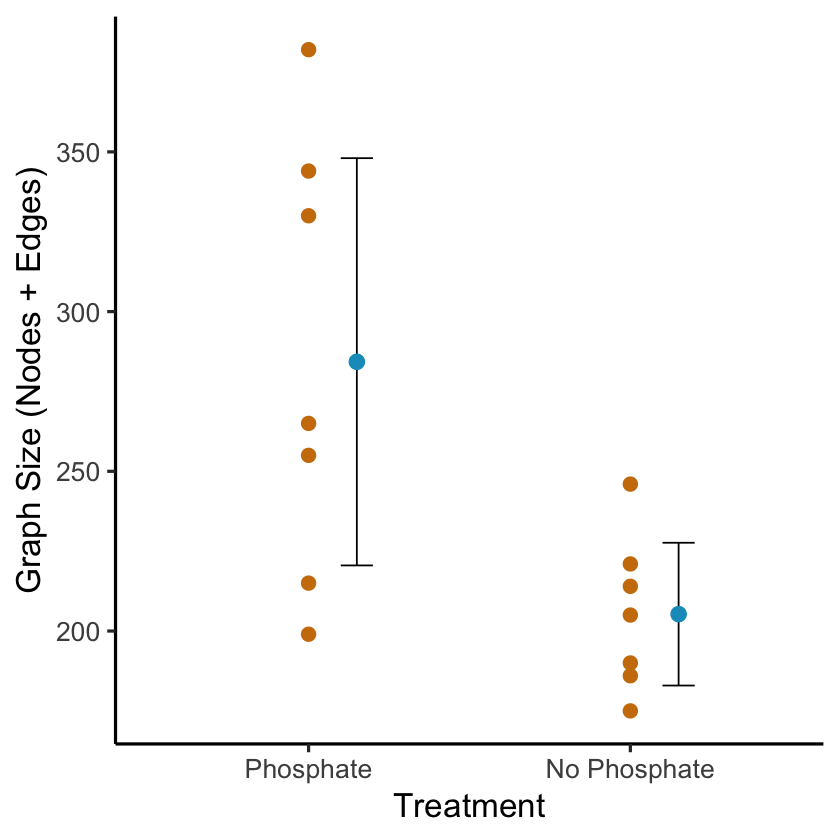

In [101]:
#Strip chart with mean and 95% confidence interval as error bars)
ggplot(myData, aes(x = Treatment, y = Nodes + Edges)) +
  geom_point(color = "#cd7c0a", size = 4, shape = 16) +
  stat_summary(fun.data = mean_cl_normal, geom = "errorbar",
               width = 0.1, position = position_nudge(x = 0.15)) +
  stat_summary(fun.y = mean, geom = "point", color = "#149cc5",
               size = 4, position = position_nudge(x = 0.15)) +
  labs(x = "Treatment", y = "Graph Size (Nodes + Edges)") +
  theme_classic(base_size = 20)

### Root Sizes ###

In [45]:
rootData <- read.csv("/Users/cece/code/StatsLifeEnvScience/roots.csv")
rootData

Length..cm.,Treatment
<dbl>,<chr>
0.24079284,Phosphate
0.19363664,Phosphate
0.07144570,Phosphate
0.46319263,Phosphate
0.11906964,Phosphate
0.13804778,Phosphate
0.05456663,Phosphate
0.35852985,Phosphate
0.31643473,Phosphate


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


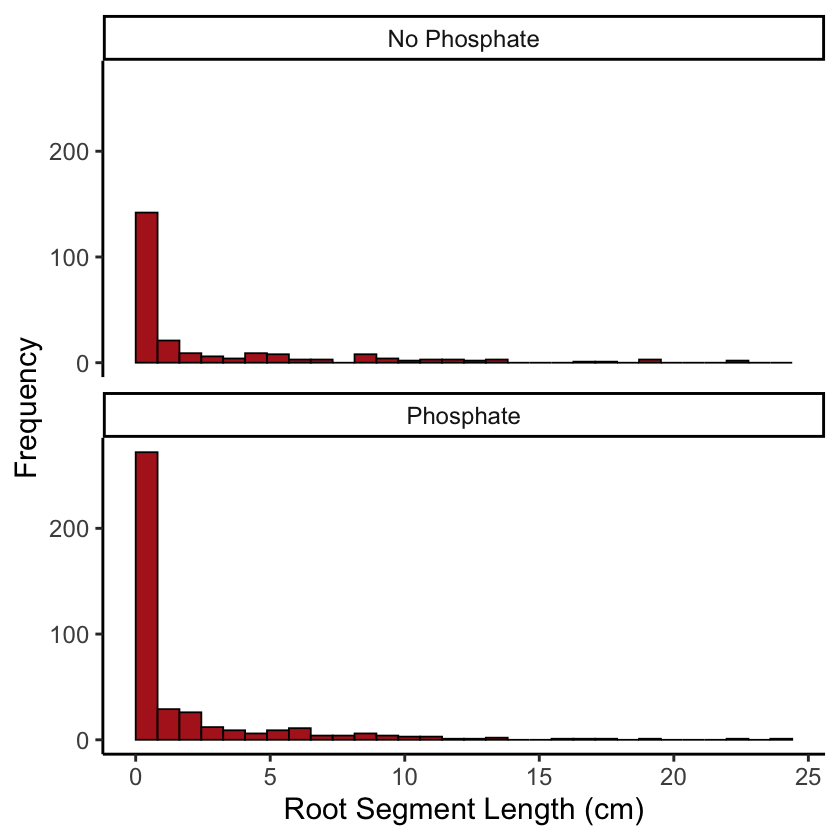

In [112]:
ggplot(rootData, aes(x = Length..cm.)) + 
  geom_histogram(fill = "firebrick", col = "black",
                 boundary = 0, closed = "left") +
  facet_wrap( ~ Treatment, ncol = 1, scales = "fixed") +
  labs(x = "Root Segment Length (cm)", y = "Frequency") +
  theme_classic(base_size = 18)

### Mean Branching Order ###

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


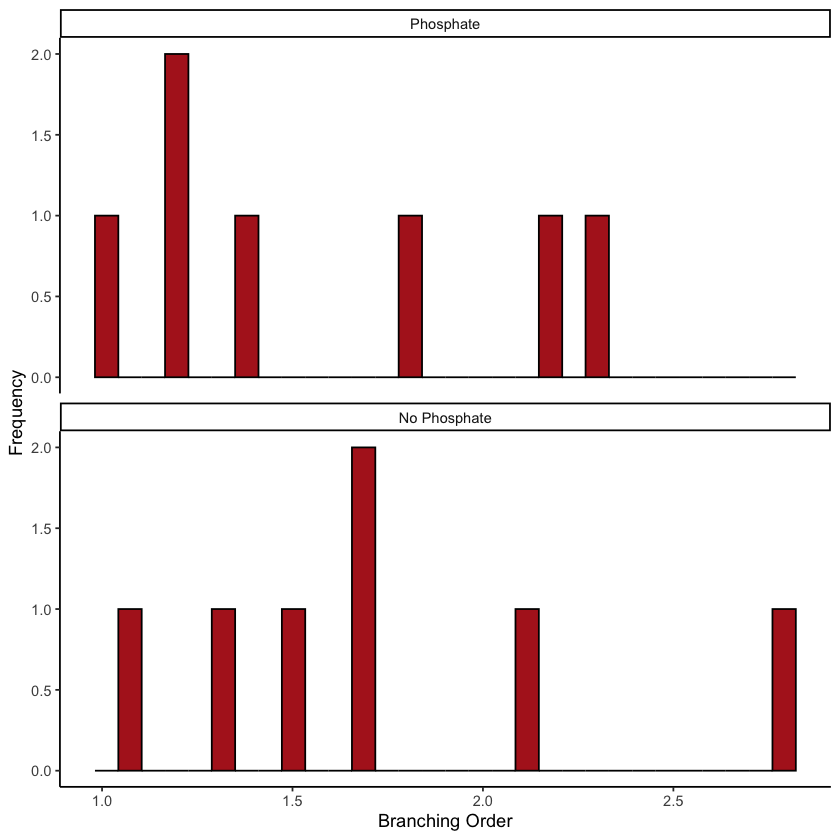

In [ ]:
# visual inspection of data
myData$Treatment <- factor(myData$Treatment, levels = c("Phosphate", "No Phosphate"))

ggplot(myData, aes(x = Branching.Order)) + 
  geom_histogram(fill = "firebrick", col = "black",
                 boundary = 0, closed = "left") +
  facet_wrap( ~ Treatment, ncol = 1, scales = "free_y") +
  labs(x = "Branching Order", y = "Frequency") + 
    theme_classic()


In [ ]:
# Test for normality

# pooled data
shapiro.test(myData$Branching.Order)

# individual samples tested
myData %>% group_by(Treatment) %>%  
  summarise(statistic = shapiro.test(myData$Branching.Order)$statistic,
            p.value = shapiro.test(myData$Branching.Order)$p.value)


	Shapiro-Wilk normality test

data:  myData$Branching.Order
W = 0.93094, p-value = 0.3145


Treatment,statistic,p.value
<fct>,<dbl>,<dbl>
Phosphate,0.9309392,0.3145238
No Phosphate,0.9309392,0.3145238


In [ ]:
# Test for equal variance: levene's test
leveneTest(myData$Branching.Order, group = myData$Treatment,
           center = mean)
           

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.02100701,0.8871658
,12,NA,NA


In [62]:
# 2-sample t-test
t.test( Branching.Order ~ Treatment, data = myData, var.equal = FALSE)


	Welch Two Sample t-test

data:  Branching.Order by Treatment
t = -0.55658, df = 11.833, p-value = 0.5882
alternative hypothesis: true difference in means between group Phosphate and group No Phosphate is not equal to 0
95 percent confidence interval:
 -0.7856058  0.4663057
sample estimates:
   mean in group Phosphate mean in group No Phosphate 
                   1.58440                    1.74405 


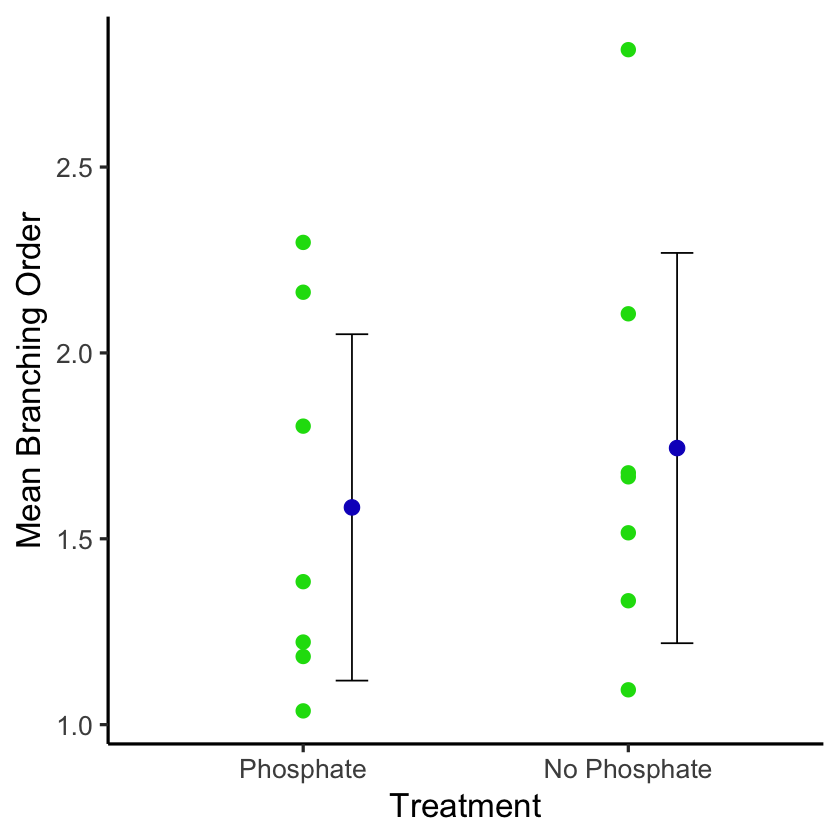

In [96]:
#Strip chart with mean and 95% confidence interval as error bars)
ggplot(myData, aes(x = Treatment, y = Branching.Order)) +
  geom_point(color = "#0edc0e", size = 4, shape = 16) +
  stat_summary(fun.data = mean_cl_normal, geom = "errorbar",
               width = 0.1, position = position_nudge(x = 0.15)) +
  stat_summary(fun.y = mean, geom = "point", color = "#1423c5",
               size = 4, position = position_nudge(x = 0.15)) +
  labs(x = "Treatment", y = "Mean Branching Order") +
  theme_classic(base_size = 20)

### Mean Prelength ###

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


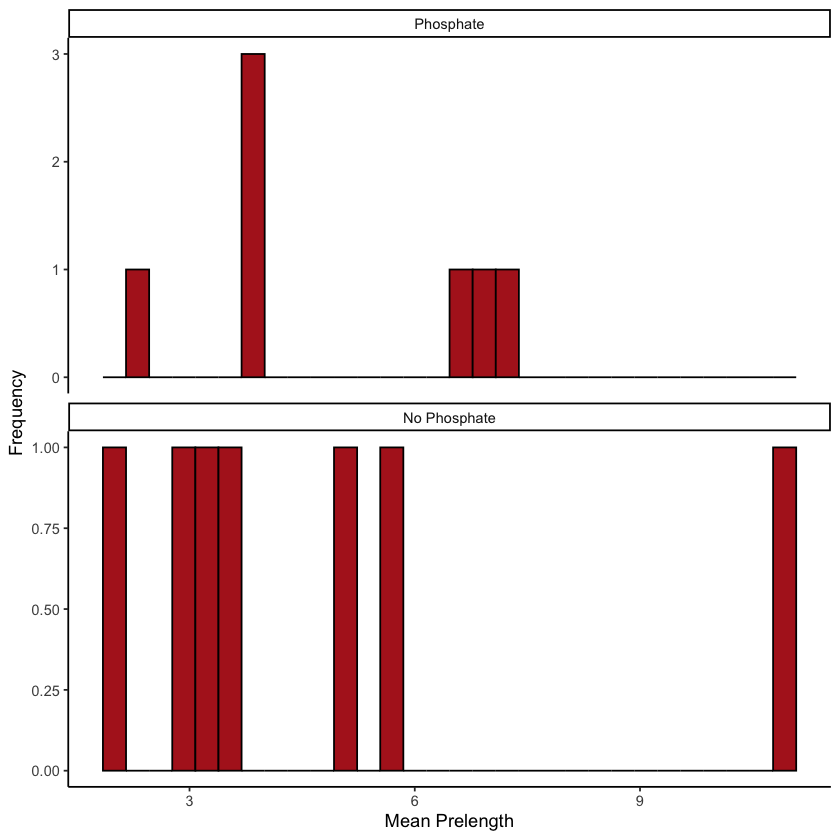

In [68]:
# visual inspection of data
myData$Treatment <- factor(myData$Treatment, levels = c("Phosphate", "No Phosphate"))

ggplot(myData, aes(x = Prelength..cm.)) + 
  geom_histogram(fill = "firebrick", col = "black",
                 boundary = 0, closed = "left") +
  facet_wrap( ~ Treatment, ncol = 1, scales = "free_y") +
  labs(x = "Mean Prelength", y = "Frequency") + 
    theme_classic()

In [60]:
# Test for normality

# pooled data
shapiro.test(myData$Prelength..cm.)

# individual samples tested
myData %>% group_by(Treatment) %>%  
  summarise(statistic = shapiro.test(myData$Prelength..cm.)$statistic,
            p.value = shapiro.test(myData$Prelength..cm.)$p.value)


	Shapiro-Wilk normality test

data:  myData$Prelength..cm.
W = 0.89958, p-value = 0.1112


Treatment,statistic,p.value
<fct>,<dbl>,<dbl>
Phosphate,0.8995844,0.1112287
No Phosphate,0.8995844,0.1112287


In [61]:
# Test for equal variance: levene's test
leveneTest(myData$Prelength..cm., group = myData$Treatment,
           center = mean)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.239564,0.6333459
,12,NA,NA


In [64]:
# 2-sample t-test
t.test( Prelength..cm. ~ Treatment, data = myData, var.equal = FALSE)


	Welch Two Sample t-test

data:  Prelength..cm. by Treatment
t = 0.14956, df = 10.377, p-value = 0.884
alternative hypothesis: true difference in means between group Phosphate and group No Phosphate is not equal to 0
95 percent confidence interval:
 -2.803471  3.209044
sample estimates:
   mean in group Phosphate mean in group No Phosphate 
                  4.975809                   4.773022 


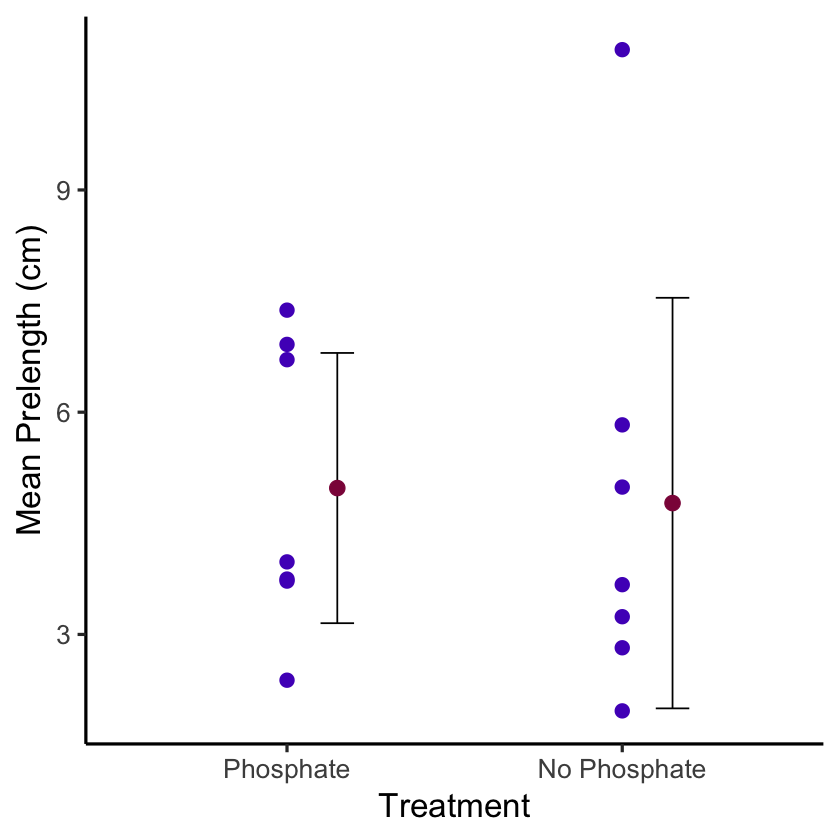

In [94]:
#Strip chart with mean and 95% confidence interval as error bars)
ggplot(myData, aes(x = Treatment, y = Prelength..cm.)) +
  geom_point(color = "#5320c2", size = 4, shape = 16) +
  stat_summary(fun.data = mean_cl_normal, geom = "errorbar",
               width = 0.1, position = position_nudge(x = 0.15)) +
  stat_summary(fun.y = mean, geom = "point", color = "#8d1648",
               size = 4, position = position_nudge(x = 0.15)) +
  labs(x = "Treatment", y = "Mean Prelength (cm)") +
  theme_classic(base_size = 20)

### Root System Width ###

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


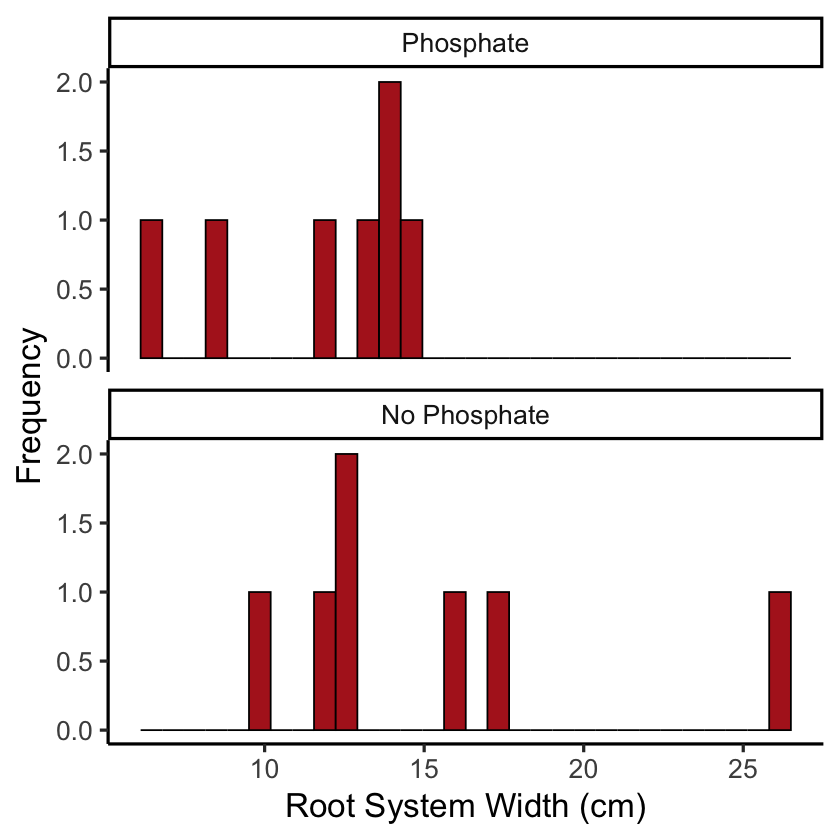

In [92]:
# visual inspection of data
myData$Treatment <- factor(myData$Treatment, levels = c("Phosphate", "No Phosphate"))

ggplot(myData, aes(x = Root.System.Width..cm.	)) +
  geom_histogram(fill = "firebrick", col = "black",
                 boundary = 0, closed = "left") +
  facet_wrap( ~ Treatment, ncol = 1, scales = "free_y") +
  labs(x = "Root System Width (cm)", y = "Frequency") +
    theme_classic(base_size = 20)

In [71]:
# Test for normality

# pooled data
shapiro.test(myData$Root.System.Width..cm.)

# individual samples tested
myData %>% group_by(Treatment) %>%  
  summarise(statistic = shapiro.test(myData$Root.System.Width..cm.)$statistic,
            p.value = shapiro.test(myData$Root.System.Width..cm.)$p.value)


	Shapiro-Wilk normality test

data:  myData$Root.System.Width..cm.
W = 0.88063, p-value = 0.05932


Treatment,statistic,p.value
<fct>,<dbl>,<dbl>
Phosphate,0.8806264,0.05932214
No Phosphate,0.8806264,0.05932214


In [72]:
# Test for equal variance: levene's test
leveneTest(myData$Root.System.Width..cm., group = myData$Treatment,
           center = mean)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.9327175,0.3532186
,12,NA,NA


In [73]:
# 2-sample t-test
t.test( Root.System.Width..cm. ~ Treatment, data = myData, var.equal = FALSE)


	Welch Two Sample t-test

data:  Root.System.Width..cm. by Treatment
t = -1.3983, df = 9.7668, p-value = 0.193
alternative hypothesis: true difference in means between group Phosphate and group No Phosphate is not equal to 0
95 percent confidence interval:
 -8.575539  1.975539
sample estimates:
   mean in group Phosphate mean in group No Phosphate 
                  11.82857                   15.12857 


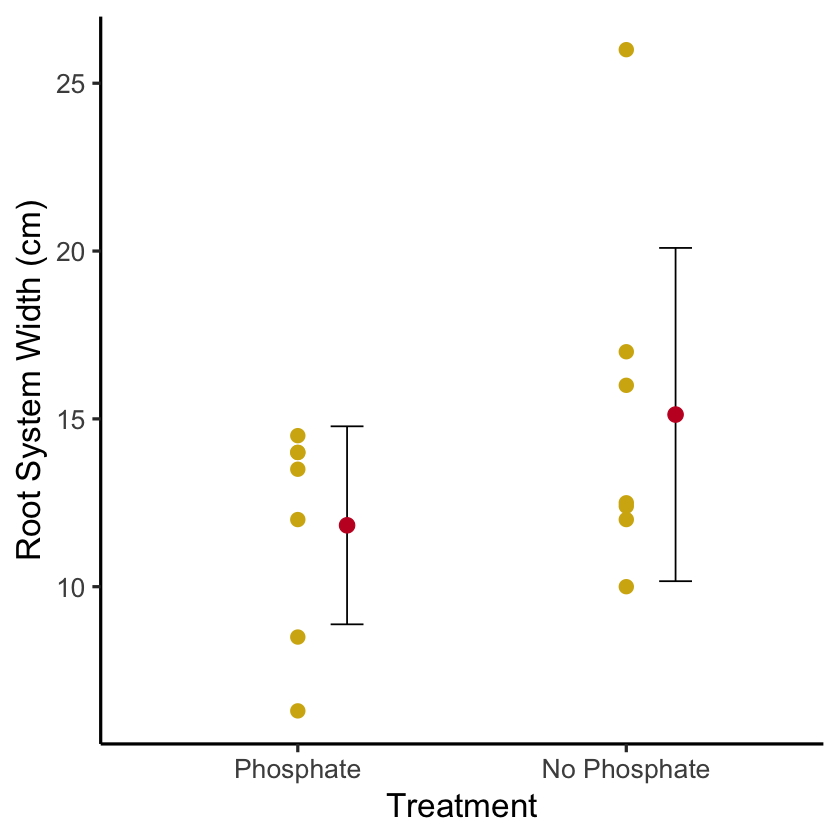

In [91]:
#Strip chart with mean and 95% confidence interval as error bars)
ggplot(myData, aes(x = Treatment, y = Root.System.Width..cm.)) +
  geom_point(color = "#d3b20f", size = 4, shape = 16) +
  stat_summary(fun.data = mean_cl_normal, geom = "errorbar",
               width = 0.1, position = position_nudge(x = 0.15)) +
  stat_summary(fun.y = mean, geom = "point", color = "#c51429",
               size = 4, position = position_nudge(x = 0.15)) +
  labs(x = "Treatment", y = "Root System Width (cm)") +
  theme_classic(base_size = 20)

### Number of Lateral Roots ###

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


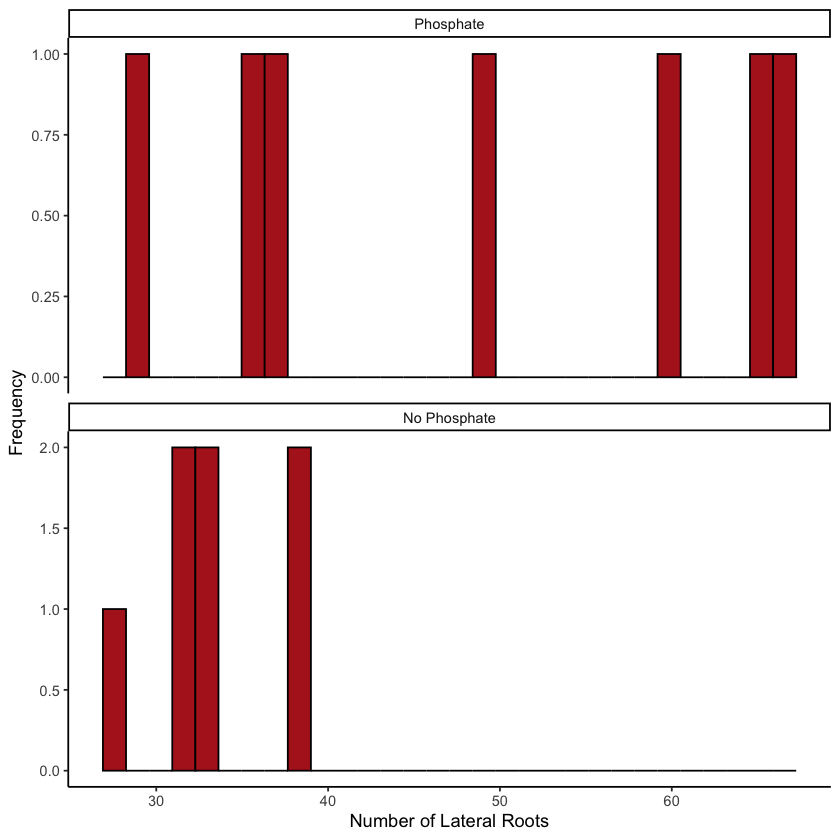

In [75]:
# visual inspection of data
myData$Treatment <- factor(myData$Treatment, levels = c("Phosphate", "No Phosphate"))

ggplot(myData, aes(x = Number.of.Lateral.Roots)) +
  geom_histogram(fill = "firebrick", col = "black",
                 boundary = 0, closed = "left") +
  facet_wrap( ~ Treatment, ncol = 1, scales = "free_y") +
  labs(x = "Number of Lateral Roots", y = "Frequency") +
    theme_classic()

In [76]:
# Test for normality

# pooled data
shapiro.test(myData$Number.of.Lateral.Roots)

# individual samples tested
myData %>% group_by(Treatment) %>%  
  summarise(statistic = shapiro.test(myData$Number.of.Lateral.Roots)$statistic,
            p.value = shapiro.test(myData$Number.of.Lateral.Roots)$p.value)


	Shapiro-Wilk normality test

data:  myData$Number.of.Lateral.Roots
W = 0.8155, p-value = 0.007811


Treatment,statistic,p.value
<fct>,<dbl>,<dbl>
Phosphate,0.8155007,0.007810633
No Phosphate,0.8155007,0.007810633


In [ ]:
# Test for equal variance: levene's test
leveneTest(myData$umber.of.Lateral.RootsN, group = myData$Treatment,
           center = mean)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,14.60844,0.0024302
,12,NA,NA


In [79]:
# 2-sample t-test
t.test( Number.of.Lateral.Roots ~ Treatment, data = myData, var.equal = TRUE)


	Two Sample t-test

data:  Number.of.Lateral.Roots by Treatment
t = 2.6777, df = 12, p-value = 0.02012
alternative hypothesis: true difference in means between group Phosphate and group No Phosphate is not equal to 0
95 percent confidence interval:
  2.954592 28.759694
sample estimates:
   mean in group Phosphate mean in group No Phosphate 
                  48.85714                   33.00000 


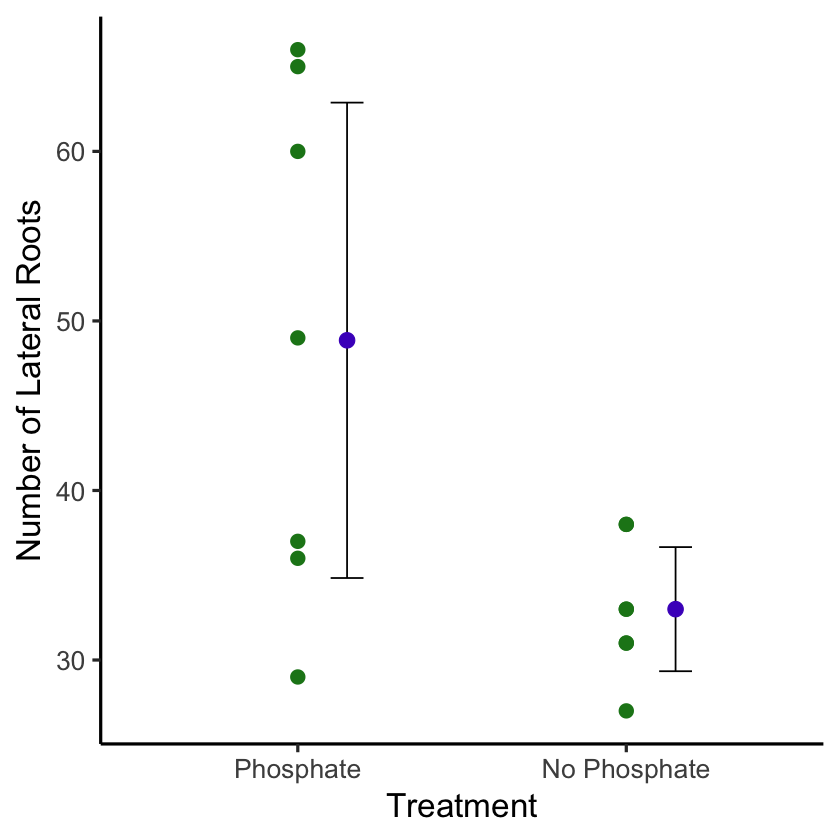

In [110]:
#Strip chart with mean and 95% confidence interval as error bars)
ggplot(myData, aes(x = Treatment, y = Number.of.Lateral.Roots)) +
  geom_point(color = "#1d831d", size = 4, shape = 16) +
  stat_summary(fun.data = mean_cl_normal, geom = "errorbar",
               width = 0.1, position = position_nudge(x = 0.15)) +
  stat_summary(fun.y = mean, geom = "point", color = "#4c14c5",
               size = 4, position = position_nudge(x = 0.15)) +
  labs(x = "Treatment", y = "Number of Lateral Roots") +
  theme_classic(base_size = 20)
